# Fitting the Keeling Curve

Gareth Funning, University of California, Riverside

This is an exercise in curve fitting to a classic Earth Science dataset $-$ the contemporary CO$_2$ record from Mauna Loa, [as first measured by Charles David Keeling in 1958](https://keelingcurve.ucsd.edu/). This record, showing an accelerating increase in carbon dioxide concentrations in the Earth's atmosphere through the late 20th and early 21st Centuries, was famously shown by Al Gore in his movie [An Inconvenient Truth](https://en.wikipedia.org/wiki/An_Inconvenient_Truth) as part of his call to act to reduce carbon emissions and prevent extreme global warming. We will download the data, plot it up, and try to fit various functions to it. 

This is also an opportunity to get to know Jupyter notebooks and to learn and use the Markdown syntax. These are very helpful for running authentic codes and scripts, and displaying and explaining results!

## 0. Introduction to Jupyter and Markdown

[Jupyter](https://docs.jupyter.org/en/latest/) was developed as a platform for running authentic codes in a web browser, alongside explanatory text, figures and graphical output. It is most commonly associated with Python codes, but supports over 40 programming languages, including Julia and R (representing the "Ju" and "r" in "Jupyter", respectively, alongside the "pyt" for Python). I will briefly describe a few elements of Jupyter before we get stuck into actually using it...

### 0.1 Notebooks

The basic unit of Jupyter computing is the **Jupyter notebook**. This is a document that renders as a webpage, including snippets of code (contained in so-called **code cells**) and areas of formatted text, embedded images and links (contained in so-called **Markdown cells**). This document is one, of course (and this text, with its hierarchical headings and boldface text) is in a Markdown cell). The contents of each cell need to be executed in order for them to do anything. You can do this by slicking the 'Run' button  on the toolbar at the top of the window, or by pressing Shift+Enter on the keyboard.

Notebook files have the suffix `.ipynb`, short for 'iPython notebook' (iPython being the 'old' name for Jupyter notebooks, short for 'interactive Python'). All of the elements, the code, text and any graphical output, are saved in one file. 

### 0.2 Code cells

Code cells are cells in which you can write and execute code. You can select which type of cell you have from the drop-down list on the toolbar. Each code cell can contain a section of a program (Python, by default), and they need not be executed all at once. One difference with a regular Python program would be the mode of execution. While a Python program will typically run from beginning to end without interruptions, you can execute code cells one by one, and view and/or plot the outcome at each step, which can be especially helpful for debugging.

All the variables and arrays that you initiate in the notebook will be retained from one code cell to the next, so there is effectively no penalty to splitting up your code like that.


### 0.3 Markdown and Markdown cells

Markdown is a formatted text syntax that is used to render clean-looking hierarchical text, headings and graphics. The syntax is pretty easy to use, and it shares some similarities with LaTeX (such as its capabilities of rendering simple equations). It is documented here: https://www.markdownguide.org/basic-syntax/ 

Markdown has its own cells in Jupyter. This is one of them! It can be quite instructive to see what is in a Markdown cell 'behind the scenes', as it were. If you double-click on the cell, all will be revealed! Then, to restore the more pleasant text rendering, you can run the Markdown cell in the same way you would run a code cell $-$ click on 'Run' or hit Shift+Enter. 

### 0.4 The kernel

Underpinning everything in Jupyter is the 'kernel' $-$ effectively a virtual machine in which the code, data and variables associated with a notebook are stored. This will keep running until it is stopped, or the user shuts down their Jupyter server. A few things to note: 1) if you keep opening notebooks without properly shutting down old kernels, you will start to eat into your system resources; 2) if your code crashes, or gets out of control, it will be somewhat comparmentilized $-$ you will be able to shutdown and restart the kernel without it crashing everything else.

In this exercise, we are going to use the default kernel, which is the Python kernel. If you want to use other programming languages (e.g. Julia), then you will need to install (and/or compile) kernels for those.

## 1. Dependencies

This is where we initialize the Python packages we are going to use $-$ [numpy](https://numpy.org/doc/stable/reference/index.html#reference) and [pygmt](https://www.pygmt.org/latest/gallery/index.html). If you are not in the correct conda environment (i.e. the environment for the course), you might see some error messages here... 

In [3]:
# import the packages we want by running this code cell
import numpy as np
import pygmt

## 2. Download and prepare the data

Download the data from the Scripps CO$_2$ website: https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html **The next thing is to look at the data and try and figure out how to 1) prepare it and 2) ingest it into Python in this notebook.**

I'm not going to tell you how to do this part.

**One hint:** starting a line with an exclamation point in a code cell allows you to run shell commands.

**Another hint:** the data will often have header lines as well as gaps that you don't want to load in. There are also more columns in these files than we want $-$ we just want the date, in a friendly format, as well as the raw CO$_2$ record. So extract only those things. 

**A third hint:** the Python command `np.loadtxt` (e.g. here: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html#numpy.loadtxt)  will help you to load text files into Python and your notebook.

**A final hint:** the command `whos`, run on its own in a code cell will tell you all of the variables and arrays that are live in your current kernel. If you know MATLAB, you might recognize it. It can be very useful!

In [4]:
# for example

#Clean data
!awk -F',' '{if((NR > 65)&&($5!=-99.99)) {print $4, $5, $6}}' monthly_in_situ_co2_mlo.csv > monthly_co2_clean.txt

!ls -l

SyntaxError: invalid syntax (1052850566.py, line 3)

In [5]:
# this blank code cell is waiting for you to fill in!
















In [6]:
whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pygmt      module    <module 'pygmt' from '/Us<...>kages/pygmt/__init__.py'>


## 3. Plot the data

**The next thing to do, which is always good practice, is to plot the things you just loaded in.** We can use PyGMT for this. PyGMT maintains almost all of the capabilities and has many similarities in syntax with regular, command-line GMT, but in a slightly fancier Python-based form. 

I am not going to give you all the details here either, but you can get a long way by looking at the examples and online help pages for PyGMT (e.g. for instance, here: https://www.pygmt.org/latest/gallery/index.html), as well as this little code snippet that is a good starting point that you can build on:

In [7]:
# a code snippet for plotting input data. you will probably need to modify it
region = [1955, 2055, 300, 500]
fig = pygmt.Figure()
fig.basemap(region=region,projection='X15c',frame=True)
fig.plot(x=data[:,0],y=data[:,1],style='c0.1c',fill='black')
#fig.plot(x=data[:,0],y=synth_data,pen='2p,red')
fig.show()

NameError: name 'data' is not defined

In [ ]:
# here is another nice, blank code cell for you...
















## 4. Fit a straight line to the data

The simplest 'model' we can fit to the data is a straight line, which is a good excuse to show off my mastery of equation syntax in Markdown:

$$y = mx +c$$

Really, of course we want to solve this as a sequence of simultaneous equations, i.e.

$$y_1 = mx_1 + c \\
  y_2 = mx_2 + c \\ 
  y_3 = mx_3 + c \\ 
  \ldots $$
  
for as many data points with $x$ and $y$ values as you have. In the case of the Mauna Loa CO$_2$ data, it's quite a lot.

If you can form appropriate matrices, ${\bf A}$ and ${\bf d}$, then you can solve for model parameters ${\bf m}$ by forming the normal equations and inverting them:

$${\bf A~m} = {\bf d} \\
  {\bf A^T A~m} = {\bf A^T d}\\
  ({\bf A^T A})^{-1} {\bf A^T A~m} = ({\bf A^T A})^{-1}{\bf A^T d} $$
  
which simplifies to:

$${\bf m} = ({\bf A^T A})^{-1}{\bf A^T d} $$

So, **I would like you to calculate the best-fitting straight line to the Mauna Loa CO$_2$ data**. I provide a code snippet below that can do the inversion part. I leave it to you to build the matrices and vectors.

**One hint**: if you need to transpose a matrix, adding `.T` to its variable name will do that. Similarly, adding `.reshape(-1, 1)` to a regular numpy row vector will make it a column vector. 

**Another hint**: `np.vstack` and `np.hstack` are useful commands for building matrices (a.k.a. 2D arrays) out of numpy vectors. `np.ones` will make a vector of ones. `np.shape` will tell you the dimensions of a numpy array. It might be helpful to look through the numpy documentation: https://numpy.org/doc/stable/index.html

/var/folders/24/dyjg_0kd3tq9lnhkp410m4y80000gn/T/ipykernel_96371/3488358893.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data= pd.read_csv('monthly_co2_clean.txt', delimiter='   ', header=None)


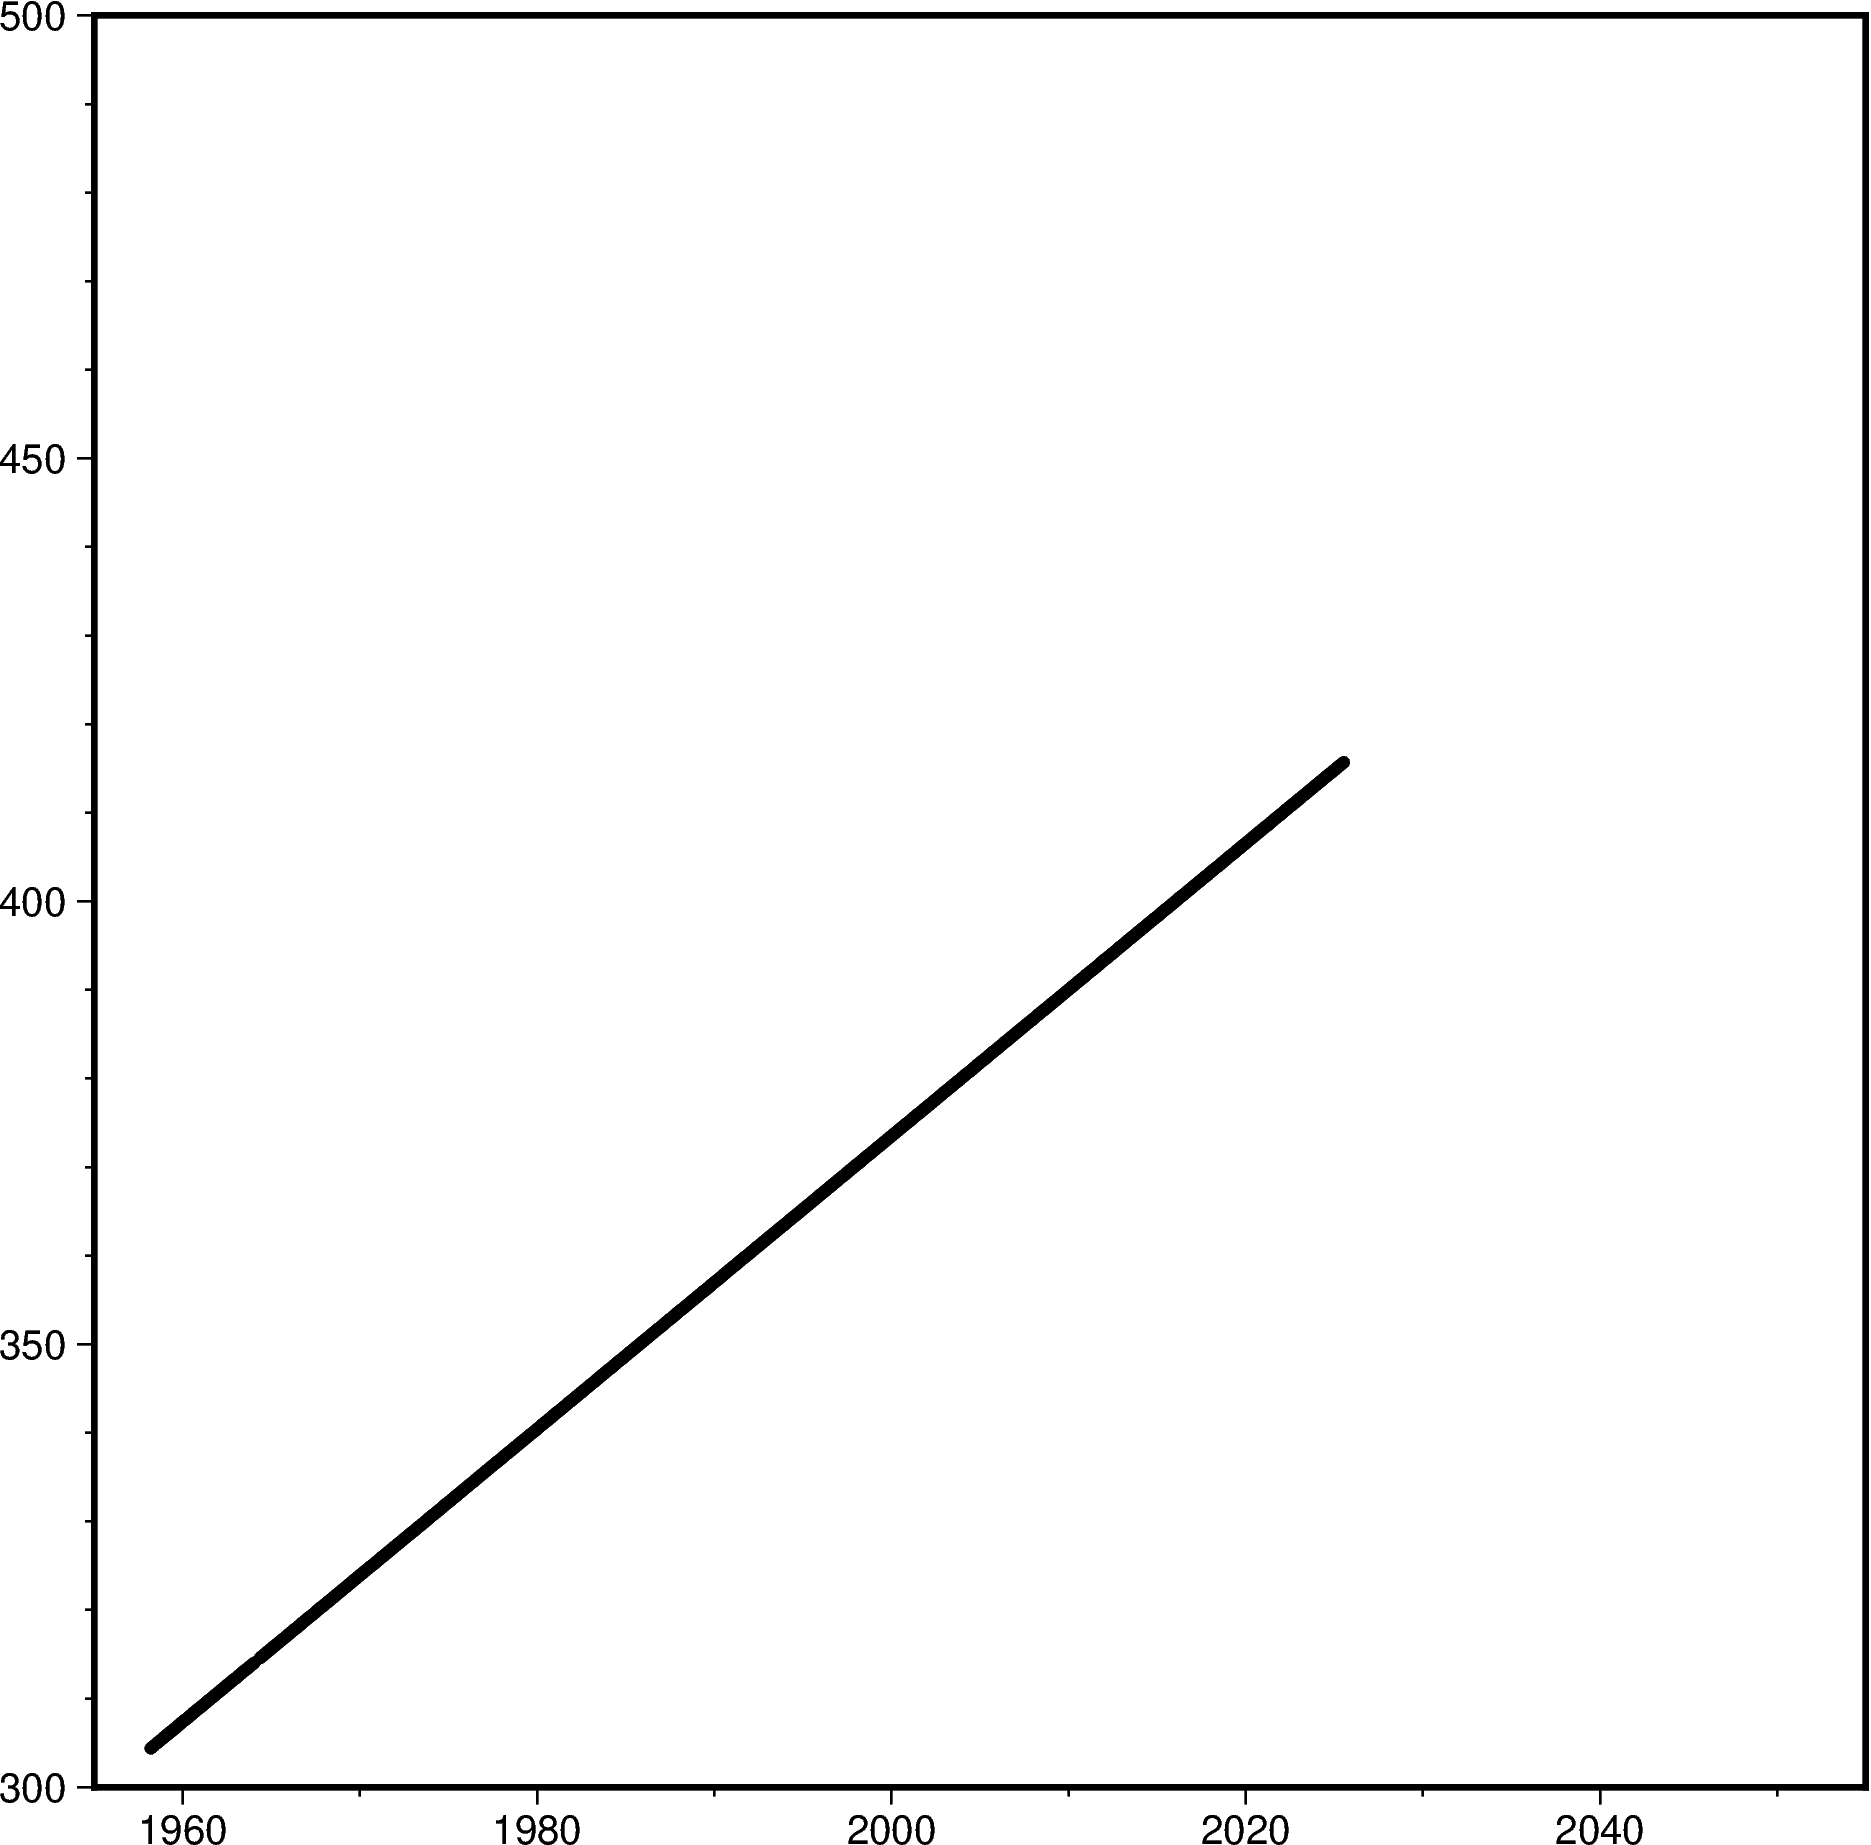

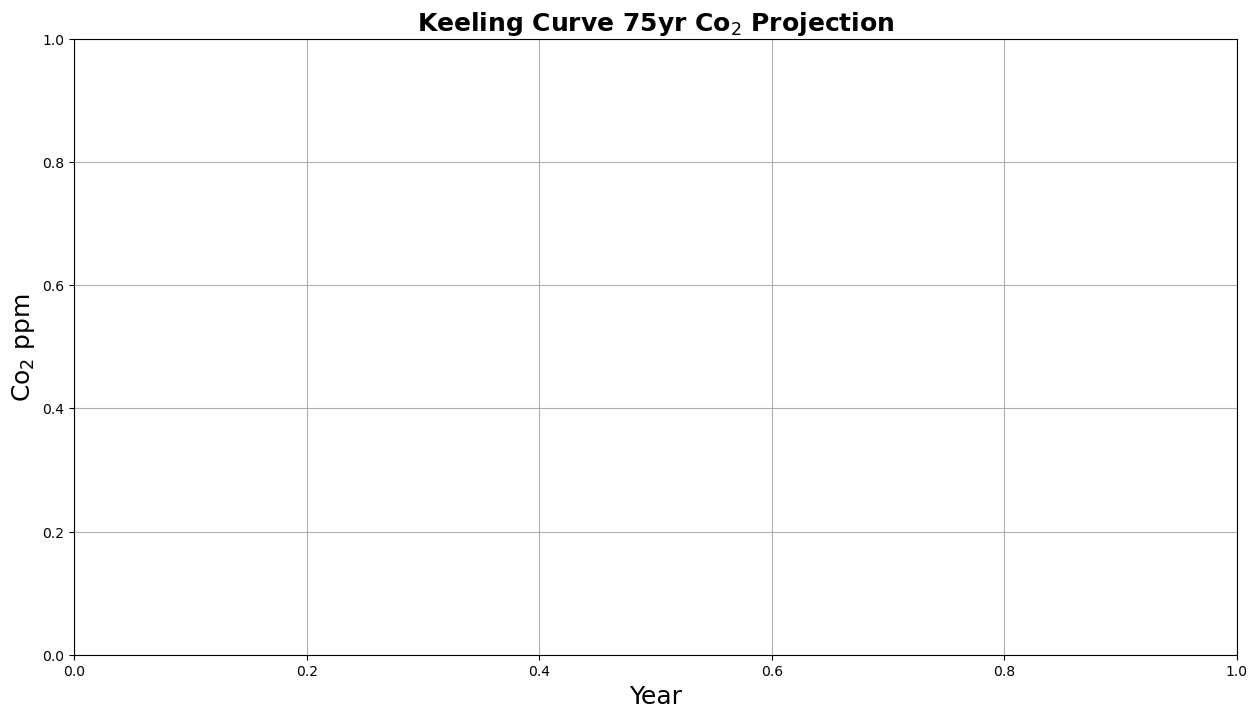

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pygmt


# Load data set plotting env
data= pd.read_csv('monthly_co2_clean.txt', delimiter='   ', header=None)
proj_period = np.arange(data[0][len(data)-1]+1/12,2101,1/12) # project a date range
time=data[0]
long_dates=np.append(time, proj_period) 
co2=np.array(data[1])
time=data[0]
ai_tkvr= (2050, 800)
ai_tkvr2= (2050, 0)
x= [ai_tkvr[0], ai_tkvr2[0]]
y= [ai_tkvr[1], ai_tkvr2[1]]
fig, ax = plt.subplots(figsize=(15,8), )
ax.grid(True)
ax.set_title(r'Keeling Curve 75yr Co$_2$ Projection', fontsize=18, fontweight='bold')
ax.set_ylabel(r'Co$_2$ ppm', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
###############################################################################################





### Begin time shift with data range to account for lag times in the data; set up arrays ###

time_shift=[]
for i in range(len(data)):
    time_shift.append(time[i]-time[0])
    
time_plt=np.vstack(time_shift) # vertical vector
ones=np.ones(time_plt.shape)

### Begin constructing data matrix ###


A=np.hstack((time_plt, ones)) # Stack collumns for horizontal vectors with shifted time

d = np.vstack(co2) # vertical vector for observational data

# Construct the normal equations in matrix form

ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# Invert ATA and multiply that by ATd

m=np.matmul(np.linalg.inv(ATA),ATd)



synth_data=np.matmul(A,m).flatten()

region = [1955, 2055, 300, 500]

fig = pygmt.Figure()
fig.basemap(region=region,projection='X15c',frame=True)
fig.plot(x=data[0],y=synth_data,style='c0.1c',fill='black')
#fig.plot(x=data[:,0],y=synth_data,pen='2p,red')
fig.show()










In [9]:
time_plt 

array([[ 0.    ],
       [ 0.085 ],
       [ 0.1672],
       [ 0.3343],
       [ 0.4192],
       [ 0.5041],
       [ 0.6713],
       [ 0.7535],
       [ 0.8384],
       [ 0.9233],
       [ 1.    ],
       [ 1.085 ],
       [ 1.1672],
       [ 1.2521],
       [ 1.3343],
       [ 1.4192],
       [ 1.5041],
       [ 1.5863],
       [ 1.6713],
       [ 1.7535],
       [ 1.8383],
       [ 1.923 ],
       [ 2.0022],
       [ 2.0869],
       [ 2.1689],
       [ 2.2536],
       [ 2.3356],
       [ 2.4203],
       [ 2.505 ],
       [ 2.5869],
       [ 2.6716],
       [ 2.7536],
       [ 2.8384],
       [ 2.9233],
       [ 3.    ],
       [ 3.085 ],
       [ 3.1672],
       [ 3.2521],
       [ 3.3343],
       [ 3.4192],
       [ 3.5041],
       [ 3.5863],
       [ 3.6713],
       [ 3.7535],
       [ 3.8384],
       [ 3.9233],
       [ 4.    ],
       [ 4.085 ],
       [ 4.1672],
       [ 4.2521],
       [ 4.3343],
       [ 4.4192],
       [ 4.5041],
       [ 4.5863],
       [ 4.6713],
       [ 4

## 5. Project your model into the future

Many climate projections run to 2100, maybe because it's just far enough into the future that the climate could be really different by then. Anyway, by retaining your model parameters ${\bf m}$ you can calculate CO$_2$ values for whenevey you want, so long as you build an ${\bf A}$ matrix for the date range you want. 

So why don't you do that? **Calculate and then plot the CO$_2$ line out to 2100.** One useful snippet is below.

In [10]:
# this will make you a long vector of annual dates that you can 
# use to project your model to 2100
long_dates=np.arange(1955,2100)

/var/folders/24/dyjg_0kd3tq9lnhkp410m4y80000gn/T/ipykernel_96371/1830254983.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data= pd.read_csv('monthly_co2_clean.txt', delimiter='   ', header=None)


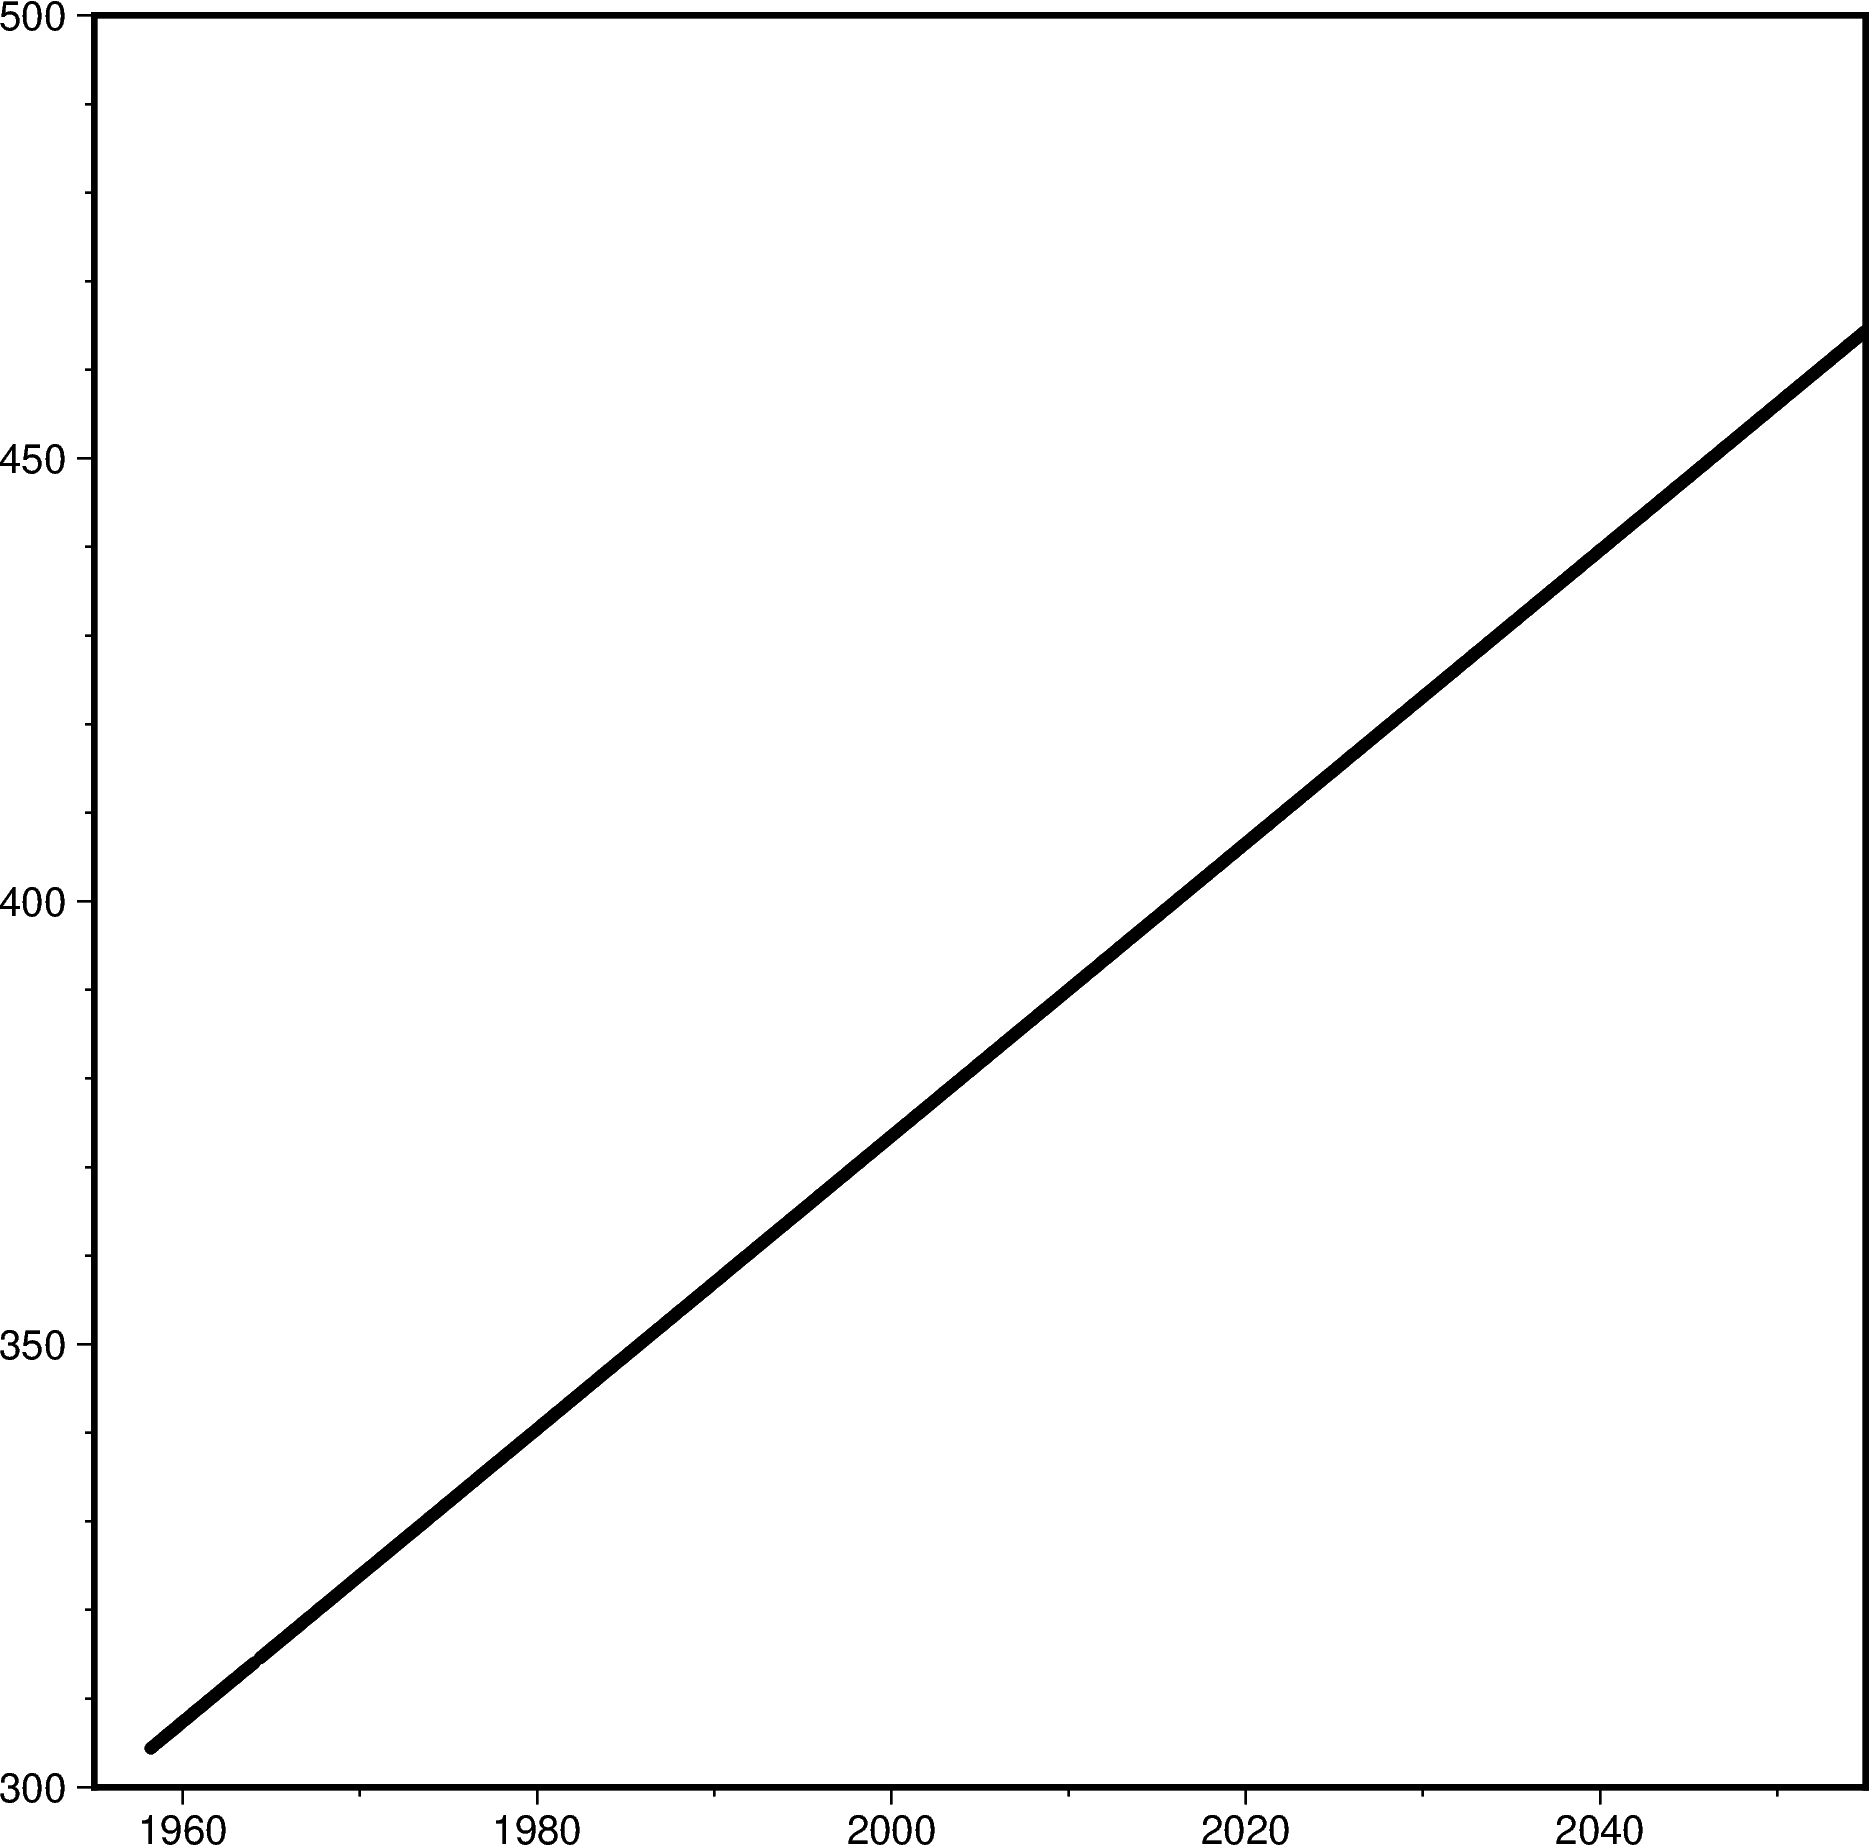

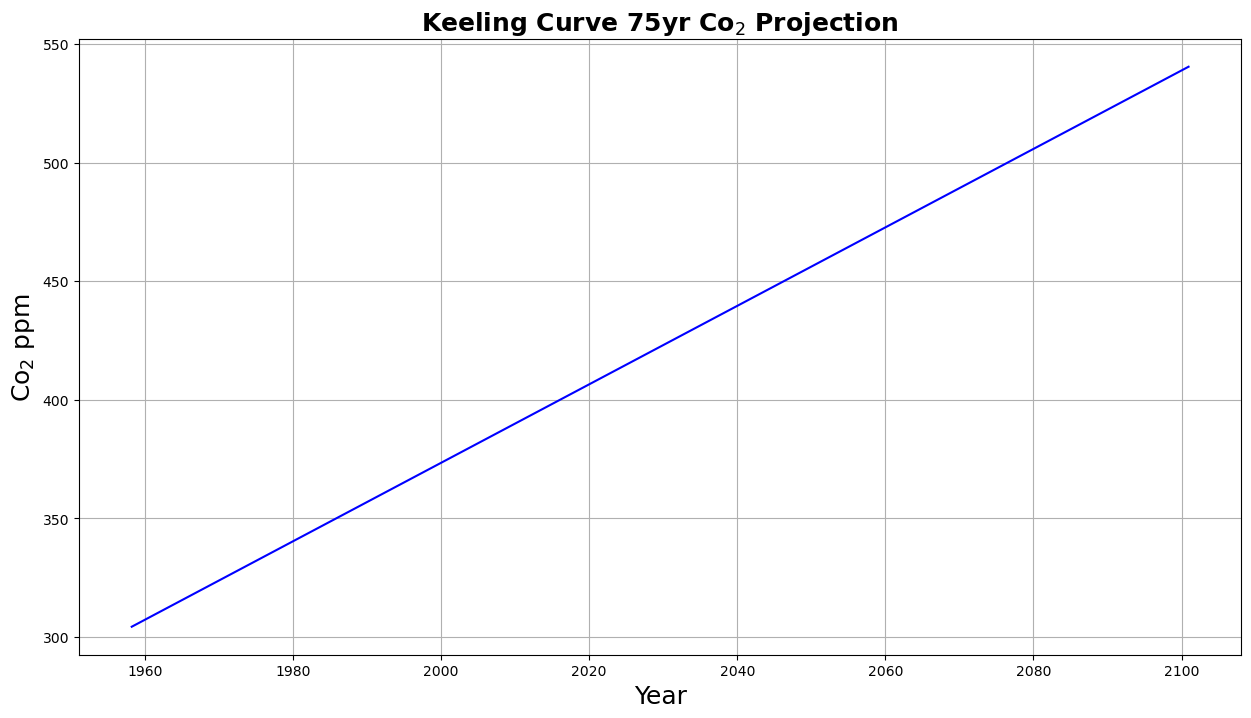

In [11]:
# blank code cell, innit






import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load data set plotting env
data= pd.read_csv('monthly_co2_clean.txt', delimiter='   ', header=None)
proj_period = np.arange(data[0][len(data)-1]+1/12,2101,1/12) # project a date range
time=data[0]
long_dates=np.append(time, proj_period) 
co2=np.array(data[1])
time=data[0]
ai_tkvr= (2050, 800)
ai_tkvr2= (2050, 0)
x= [ai_tkvr[0], ai_tkvr2[0]]
y= [ai_tkvr[1], ai_tkvr2[1]]
fig, ax = plt.subplots(figsize=(15,8), )
ax.grid(True)
ax.set_title(r'Keeling Curve 75yr Co$_2$ Projection', fontsize=18, fontweight='bold')
ax.set_ylabel(r'Co$_2$ ppm', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
###############################################################################################




### Begin time shift with data range to account for lag times in the data; set up arrays ###

time_shift=[]
for i in range(len(data)):
    time_shift.append(time[i]-time[0])
    
time_plt=np.vstack(time_shift) # vertical vector
ones=np.ones(time_plt.shape)



# Extend the data range for prediction calculations 
time_ld=[]
for i in range(len(long_dates)):
    time_ld.append(long_dates[i]-long_dates[0])
time_ld=np.vstack(time_ld) # vertical vector
ones_ld=np.ones(time_ld.shape)



### Begin constructing data matrix ###


A=np.hstack((time_plt, ones)) # Stack collumns for horizontal vectors with shifted time

d = np.vstack(co2) # vertical vector for observational data

# Construct the normal equations in matrix form

ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# Invert ATA and multiply that by ATd

m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up new matrix

A=np.hstack((time_ld, ones_ld)) # Stack collumns for horizontal vectors (1st order polynomials)


# Calculate the forward model (a.k.a. synthetic data) for your model parameters

synth_data=np.matmul(A,m).flatten()

ax.plot(long_dates, synth_data, color='b')





fig = pygmt.Figure()
fig.basemap(region=region,projection='X15c',frame=True)
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='black')
#fig.plot(x=data[:,0],y=synth_data,pen='2p,red')
fig.show()









## 7. Fit a parabola to the data

Maybe the straight line is not the most realistic model? A parabola, which is the output of a quadratic function, might be much more appropriate?

In this case, the equations we are trying to solve are of the form

$$y_1 = ax_1 ^2 + bx_1 + c \\
  y_2 = ax_2 ^2 + bx_2 + c \\ 
  y_3 = ax_3 ^2 + bx_2 +c \\ 
  \ldots $$

which implies something will have to change in the ${\bf A}$ matrix at the very least...

**Compute the best fitting parabola, and use it to project CO$_2$ levels out to 2100.**

**A hint**: calculations might start to get a bit unstable with the large values involved in such a model. It might be sensible to subtract a constant from all of the dates used in this modeling effort, to make the numbers smaller. So long as you keep track of what that number is, and don't use the modified dates for plotting, it should be fine!


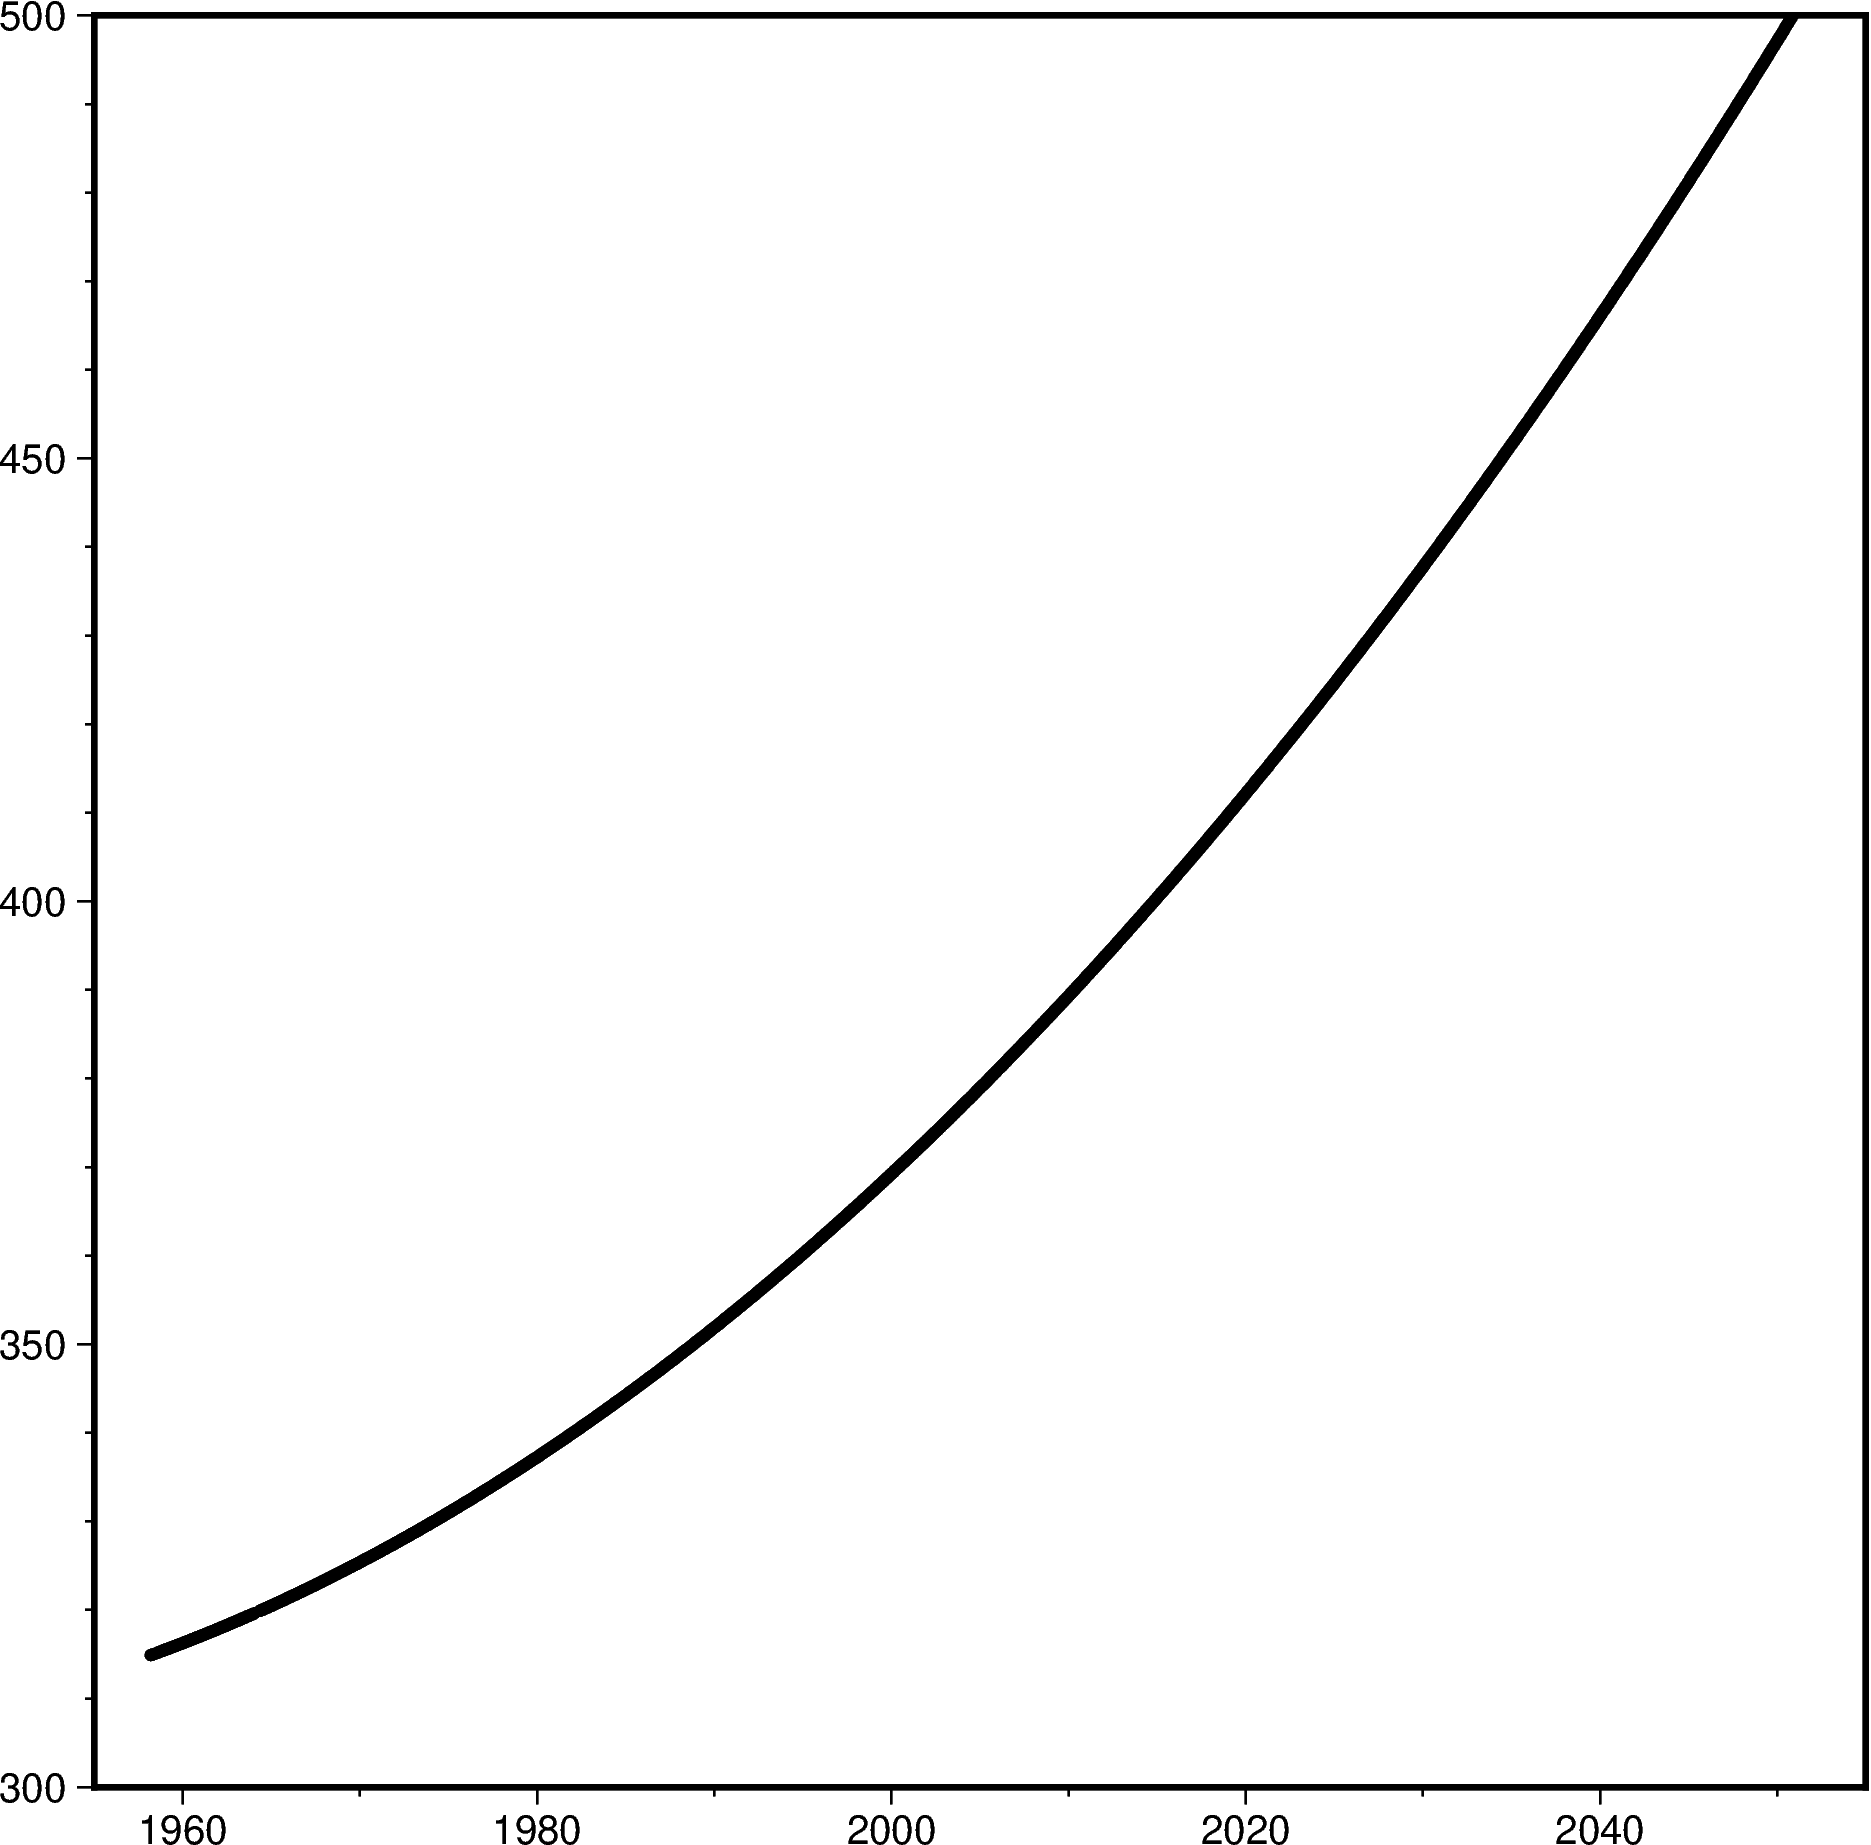

In [12]:



# Set up data matrix for 2nd order polynomials

A=np.hstack((time_plt**2, time_plt, ones)) 
# construct the normal equations in matrix form
ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# invert ATA and multiply that by ATd
m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up projection data matrix for 2nd order polynomials

A=np.hstack((time_ld**2, time_ld, ones_ld)) 

# calculate the forward model
synth_data=np.matmul(A,m).flatten()

ax.plot(long_dates, synth_data, color='green')


fig = pygmt.Figure()
fig.basemap(region=region,projection='X15c',frame=True)
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='black')
#fig.plot(x=data[:,0],y=synth_data,pen='2p,red')
fig.show()










## 8. Build higher-order polynomial models and project those, too

Now you are probably getting the hang of this? One more task to put all of this together:

**Fit, using the same method introduced above, models from a first-order polynomial function (power of $x^1$) up to a fifth-order polynomial (power of $x^5$), and plot all of them on a single plot. Then comment on the suitability of these different 'models' for projecting future CO$_2$ levels.**

**Hint**: If you want to export any of your results to text files for plotting purposes (e.g. in regular GMT), then the `np.savetxt` command is good for that.

/var/folders/24/dyjg_0kd3tq9lnhkp410m4y80000gn/T/ipykernel_96371/356243609.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data= pd.read_csv('monthly_co2_clean.txt', delimiter='   ', header=None)
PSL: Warning: Sub-scripting not terminated [CO@-2@]
PSL: Warning: Sub-scripting not terminated [CO@-2@]


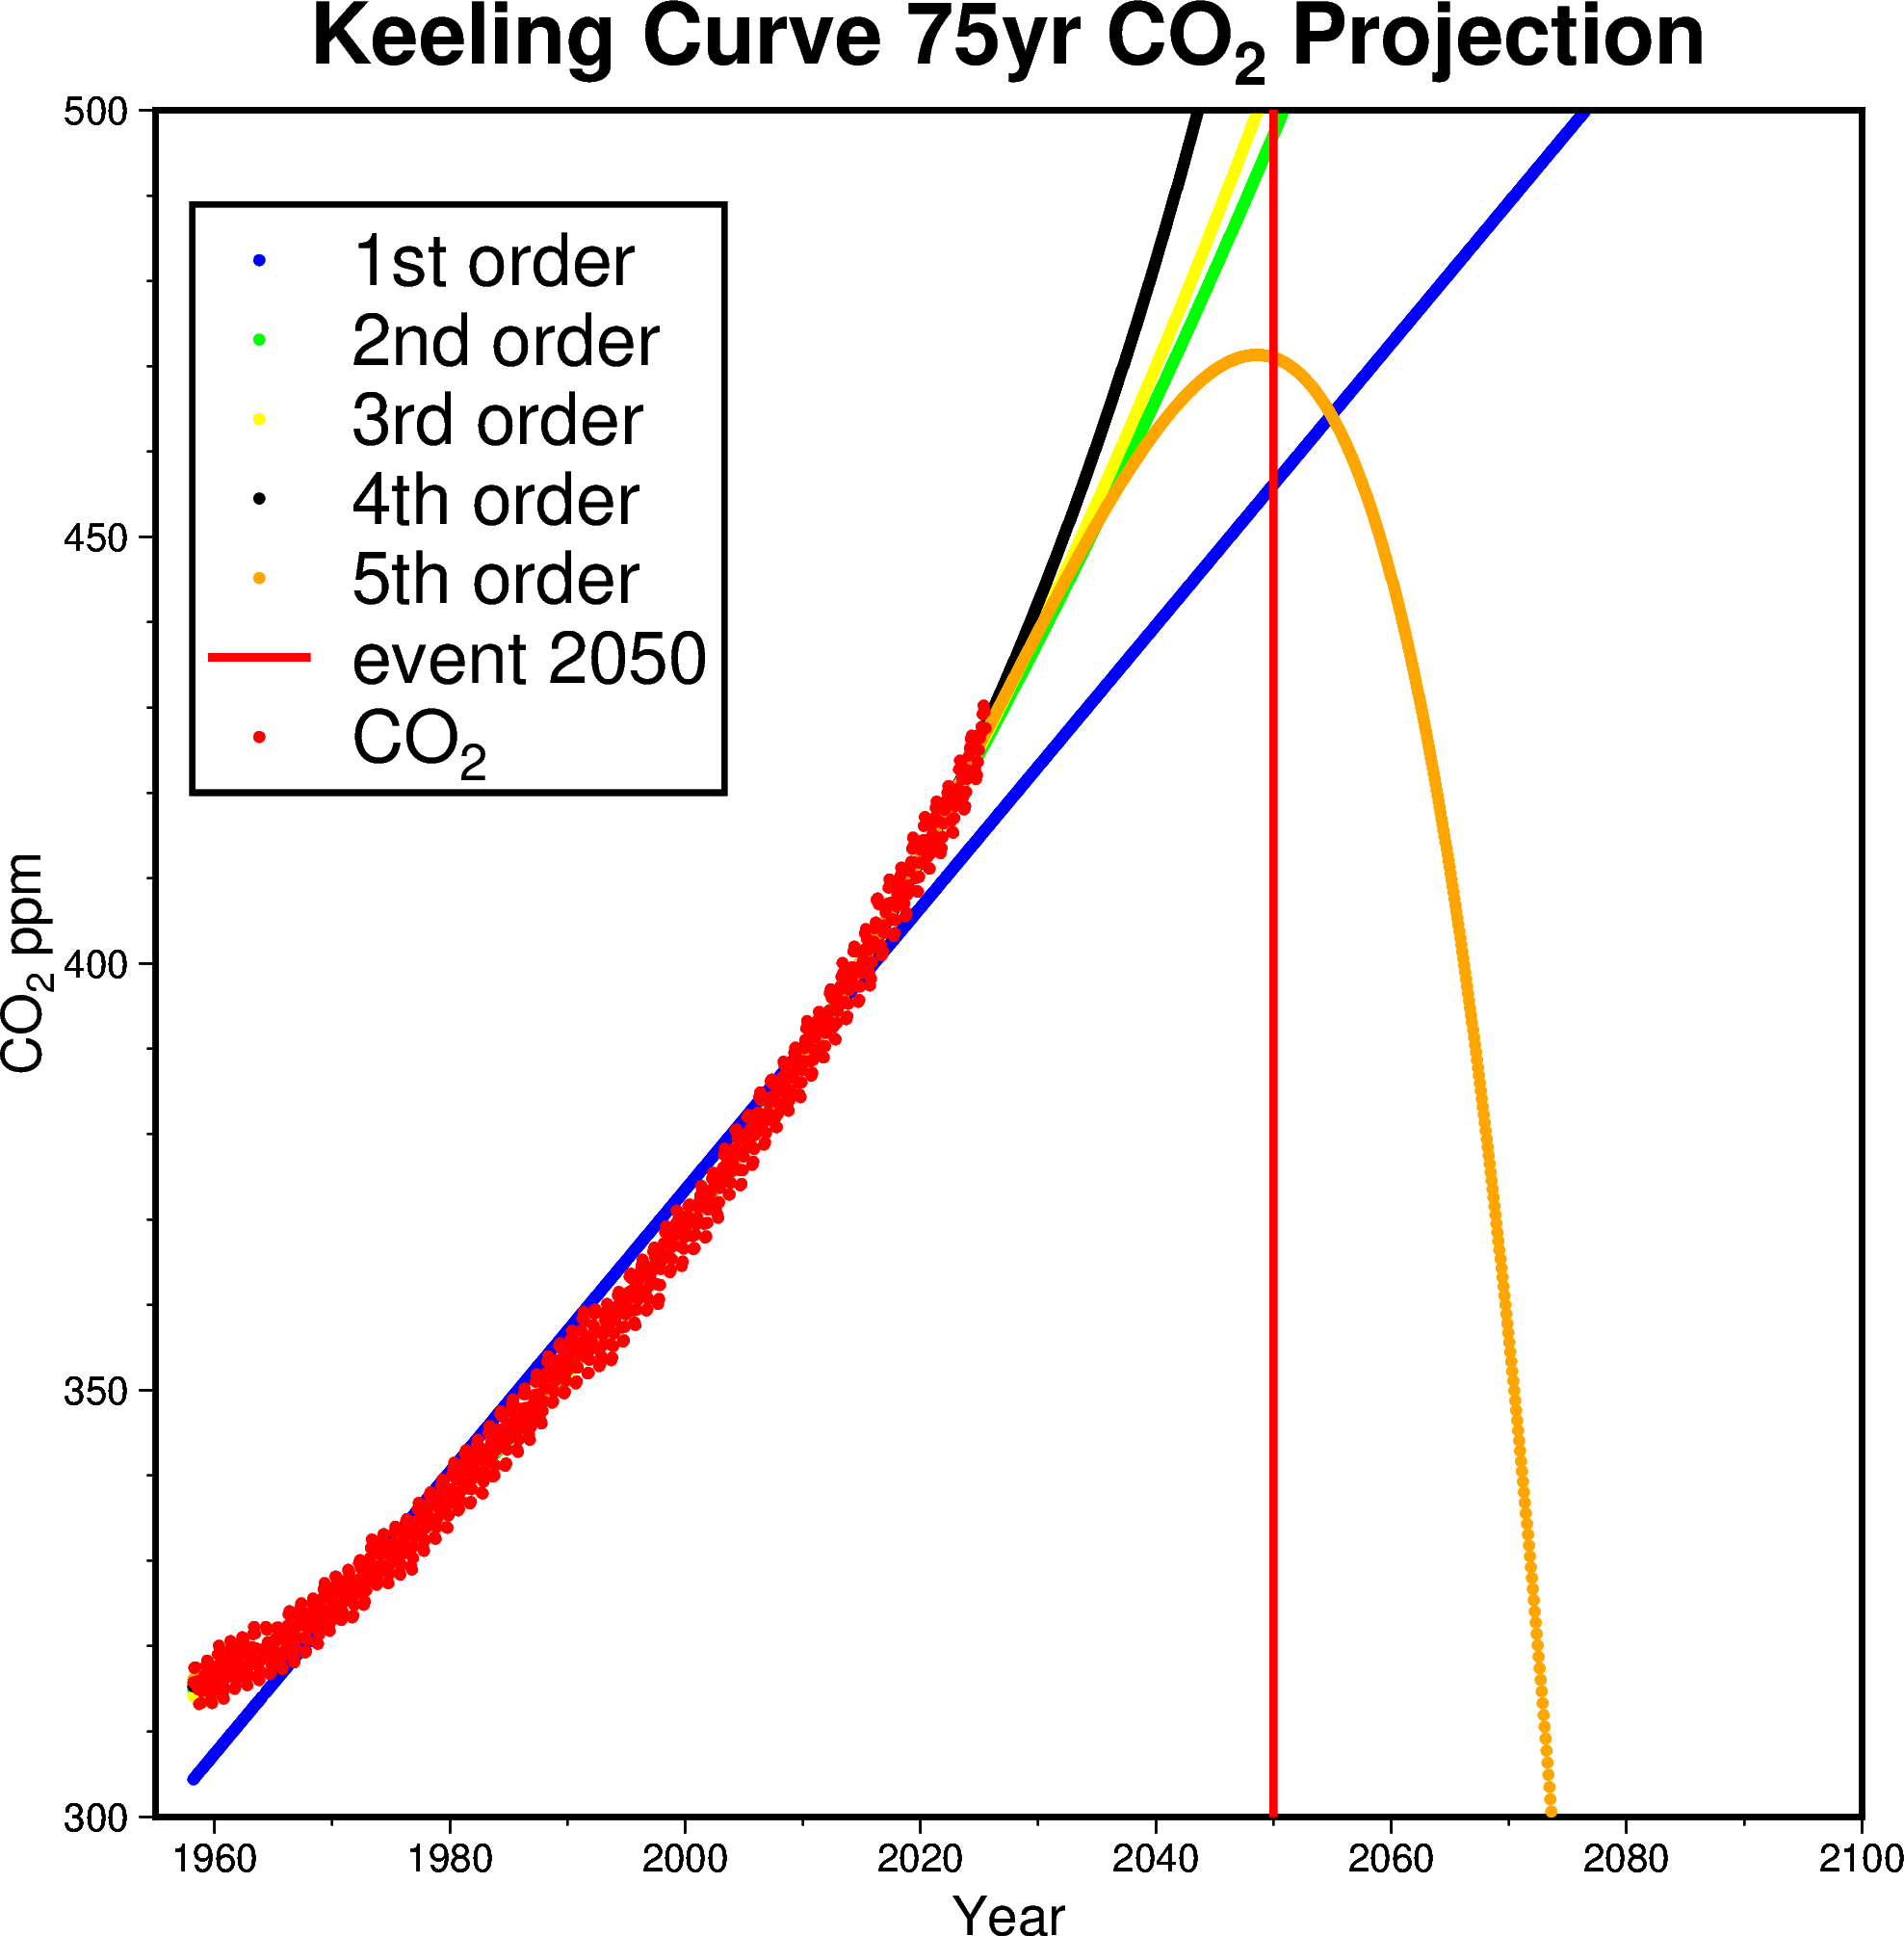

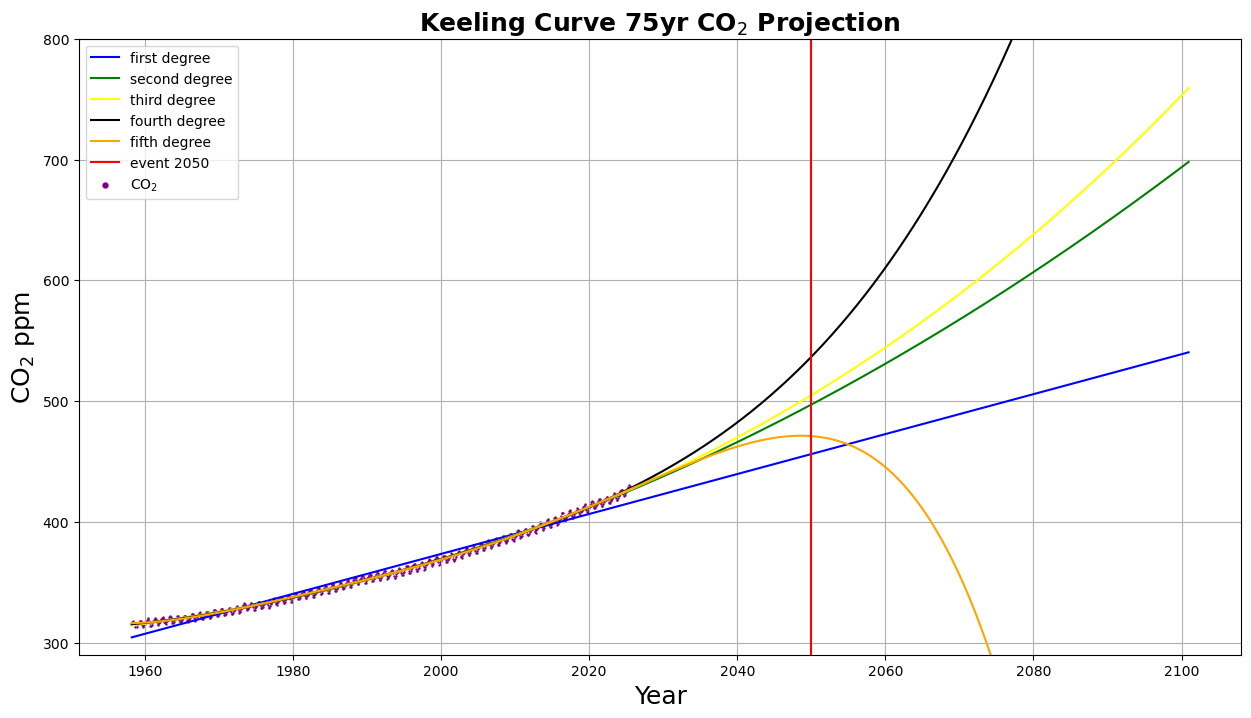

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load data set plotting env

data= pd.read_csv('monthly_co2_clean.txt', delimiter='   ', header=None)
proj_period = np.arange(data[0][len(data)-1]+1/12,2101,1/12) # project a date range
long_dates=np.append(time, proj_period) 
co2=np.array(data[1])
time=data[0]
ai_tkvr= (2050, 800)
ai_tkvr2= (2050, 0)
x= [ai_tkvr[0], ai_tkvr2[0]]
y= [ai_tkvr[1], ai_tkvr2[1]]
fig, ax = plt.subplots(figsize=(15,8), )
ax.grid(True)
ax.set_title(r'Keeling Curve 75yr CO$_2$ Projection', fontsize=18, fontweight='bold')
ax.set_ylabel(r'CO$_2$ ppm', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
###############################################################################################

fig = pygmt.Figure()
region = [1955, 2100, 300, 500]
fig.basemap(region=region,projection='X15c',frame='a')


### Begin time shift with data range to account for lag times in the data; set up arrays ###

time_shift=[]
for i in range(len(data)):
    time_shift.append(time[i]-time[0])
    
time_plt=np.vstack(time_shift) # vertical vector
ones=np.ones(time_plt.shape)



# Extend the data range for prediction calculations 
time_ld=[]
for i in range(len(long_dates)):
    time_ld.append(long_dates[i]-long_dates[0])
time_ld=np.vstack(time_ld) # vertical vector
ones_ld=np.ones(time_ld.shape)



### Begin constructing data matrix ###


A=np.hstack((time_plt, ones)) # Stack collumns for horizontal vectors with shifted time

d = np.vstack(co2) # vertical vector for observational data

# Construct the normal equations in matrix form

ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# Invert ATA and multiply that by ATd

m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up new matrix

A=np.hstack((time_ld, ones_ld)) # Stack collumns for horizontal vectors (1st order polynomials)


# Calculate the forward model (a.k.a. synthetic data) for your model parameters

synth_data=np.matmul(A,m).flatten()

ax.plot(long_dates, synth_data, color='b')
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='blue', label='1st order')
# Set up data matrix for 2nd order polynomials

A=np.hstack((time_plt**2, time_plt, ones)) 
# construct the normal equations in matrix form
ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# invert ATA and multiply that by ATd
m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up projection data matrix for 2nd order polynomials

A=np.hstack((time_ld**2, time_ld, ones_ld)) 

# calculate the forward model
synth_data=np.matmul(A,m).flatten()

ax.plot(long_dates, synth_data, color='green')
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='green', label='2nd order')

# Set up data matrix for 3rd order polynomials
A=np.hstack((time_plt**3, time_plt**2, time_plt, ones))

# construct the normal equations in matrix form
ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# invert ATA and multiply that by ATd
m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up projection data matrix for 3rd order polynomials

A=np.hstack((time_ld**3, time_ld**2, time_ld, ones_ld))

# Calculate the forward model

synth_data=np.matmul(A,m).flatten()

ax.plot(long_dates, synth_data, color='yellow')
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='yellow', label='3rd order')
# Set up data matrix for 4th order polynomials

A=np.hstack((time_plt**4, time_plt**3, time_plt**2, time_plt, ones))

# Construct the normal equations in matrix form
ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# Invert ATA and multiply that by ATd
m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up projection data matrix for 4th order polynomials

A=np.hstack((time_ld**4, time_ld**3, time_ld**2, time_ld, ones_ld))


# Calculate the forward model 

synth_data=np.matmul(A,m).flatten()

ax.plot(long_dates, synth_data, color='k')
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='black', label='4th order')
# Set up data matrix for 5th order polynomials

A=np.hstack((time_plt**5, time_plt**4, time_plt**3, time_plt**2, time_plt, ones)) 
# Construct the normal equations in matrix form
ATA=np.matmul((A).T,A)
ATd=np.matmul((A).T,d)

# Invert ATA and multiply that by ATd
m=np.matmul(np.linalg.inv(ATA),ATd)

# Set up projection data matrix for 5th order polynomials

A=np.hstack((time_ld**5, time_ld**4, time_ld**3, time_ld**2, time_ld, ones_ld)) 
# Calculate the forward model 

synth_data=np.matmul(A,m).flatten()

ax.set_ylim(290,800)

ax.plot(long_dates, synth_data, color='orange')

ax.plot(x, y, marker='', linestyle='-', color='red')
ax.scatter(time, co2, marker='o',s=.5, color='purple', )
ax.legend(['first degree', 'second degree', 'third degree', 'fourth degree', 'fifth degree', 'event 2050', r'CO$_2$'], markerscale=5.0)



fig.basemap(region=region,projection='X15c',frame=[
        "WStr+t\Keeling Curve 75yr CO@-2@- Projection", 
        "xaf+l\Year", 
        "yaf+l\CO@-2@- ppm",
    ])

pygmt.config(FONT_ANNOT_PRIMARY="18p")
fig.plot(x=long_dates,y=synth_data,style='c0.1c',fill='orange', label='5th order')
fig.plot(x=x,y=y,pen="2p,red", label='event 2050')
fig.plot(x=data[0],y=data[1],style='c0.1c',fill='red', label='CO@-2@')


fig.legend(position="JTL+o-5c/-6c", box=True )


#fig.plot(x=data[:,0],y=synth_data,pen='2p,red')
fig.show()






### Thoughts on the suitability of polynomial functions for projecting future CO$_2$ levels

We computed 5 different scenarios based on the input CO2 measurements from 1958 through the year 2025. The first order gives a modest projection ignoring the parabolic trend. The 2nd, 3rd and 4th order polynomial fit the exponential nature of the data pretty well. The 4th order polynomial gives an extreme case of increased CO2 levels. The 5th order polynomial diverges from the others in a negative trajectory. If we keep making things we will keep producing CO2 then we will keep increasing the CO2, landing on the black path. With some mitigation we can go the yellow or green route if we are really good humans. The orange path is likely an overfitting of the data. IF this is somehow not an overfitting, the rapid turn around is likely due to unfortunate circumstances.